In [1]:

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier


# Just to make sure all the out puts get printed in individual jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('Proj1_Data.csv', index_col=0)


print("\n____________________________________________________TheData___________________________________________________________\n")
data
print("\n_________________________________________________TheDiscrption________________________________________________________\n")
data.describe()


____________________________________________________TheData___________________________________________________________



,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1



_________________________________________________TheDiscrption________________________________________________________



,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
# Creating a new column for each country (simplly mapping the 'Geography' to numbers disrupted the normalization of the data)
# And then just dropping the 'Geography' cuz we dont need it anymore
data['LocFrance'] = data['Geography'].apply(lambda x: 1 if x == "France" else 0)
data['LocGermany'] = data['Geography'].apply(lambda x: 1 if x == "Germany" else 0)
data['LocSpain'] = data['Geography'].apply(lambda x: 1 if x == "Spain" else 0)

data['IsMale'] = data['Gender'].apply(lambda x: 1 if x == "Male" else 0)
data['IsFemale'] = data['Gender'].apply(lambda x: 1 if x == "Female" else 0)

data = data.drop(['Geography', 'Gender'], axis=1)





In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Now we dro the CustomerId and SurName cuz they cant affect the prediction, Exited also, cuz thats the predition itself
# And we Normalize our columns cuz they're not in the same range and could create vanishing and exploding grads
scaler = MinMaxScaler() 
data_dropped = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
data_scaled = scaler.fit_transform(data_dropped)
data_scaled = pd.DataFrame(data_scaled, columns=data_dropped.columns.tolist())
data_scaled

y = data['Exited']
x_train, x_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.25, shuffle=False)

initialW = tf.keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LocFrance,LocGermany,LocSpain,IsMale,IsFemale
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,0.0,1.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,1.0,0.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0,1.0,0.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,0.0,1.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,1.0,0.0











Here We Create Our Model

!!!

Epoch 1/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1640 - val_loss: 0.1473
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1539 - val_loss: 0.1430
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.1377
Epoch 4/100
235/235 [==============================] - 0s 986us/step - loss: 0.1425 - val_loss: 0.1330
Epoch 5/100
235/235 [==============================] - 0s 955us/step - loss: 0.1387 - val_loss: 0.1283
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1344 - val_loss: 0.1251
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1295 - val_loss: 0.1181
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.1181
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1257 - val_loss: 0.1157
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1232 - va

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss Rate')

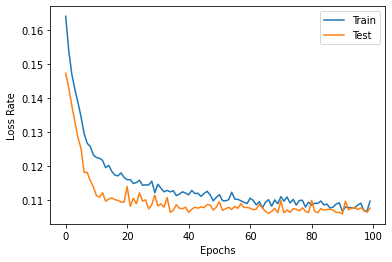

In [5]:
from tensorflow.keras.models import Sequential
network = Sequential()

network.add(tf.keras.layers.Dense(24, input_shape=(13,), kernel_initializer = initialW ))
network.add(tf.keras.layers.Activation('softmax'))
network.add(tf.keras.layers.Dropout(0.3))
network.add(tf.keras.layers.Dense(12))
network.add(tf.keras.layers.Activation('softmax'))
network.add(tf.keras.layers.Dropout(0.3))
network.add(tf.keras.layers.Dense(2))


opt = tf.keras.optimizers.Adam(learning_rate=0.01)
network.compile(optimizer=opt, loss='mse')

history = network.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100,  )



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Rate')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()





<AxesSubplot:xlabel='Exited', ylabel='count'>

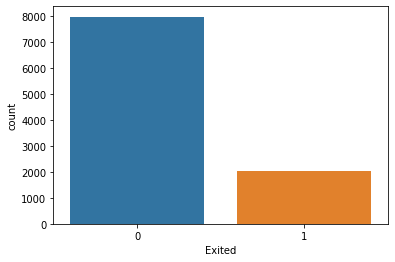

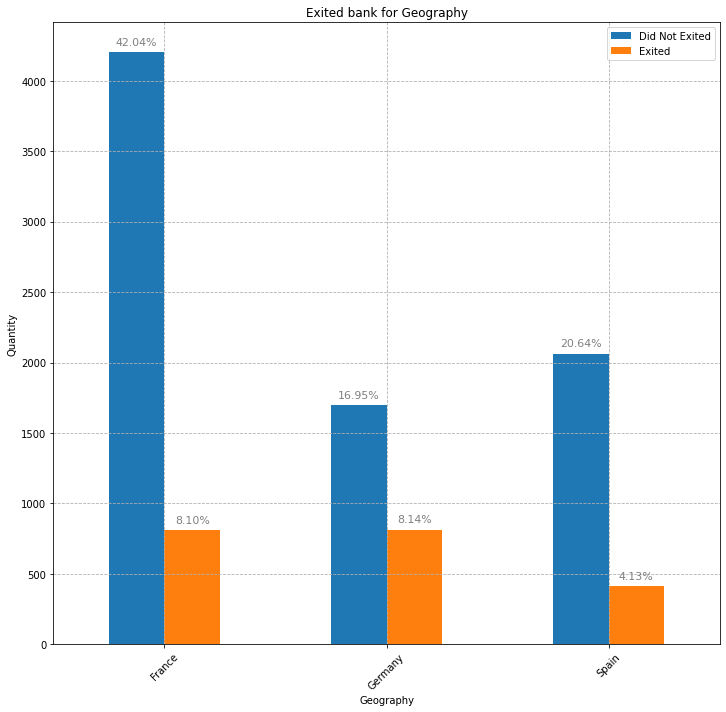

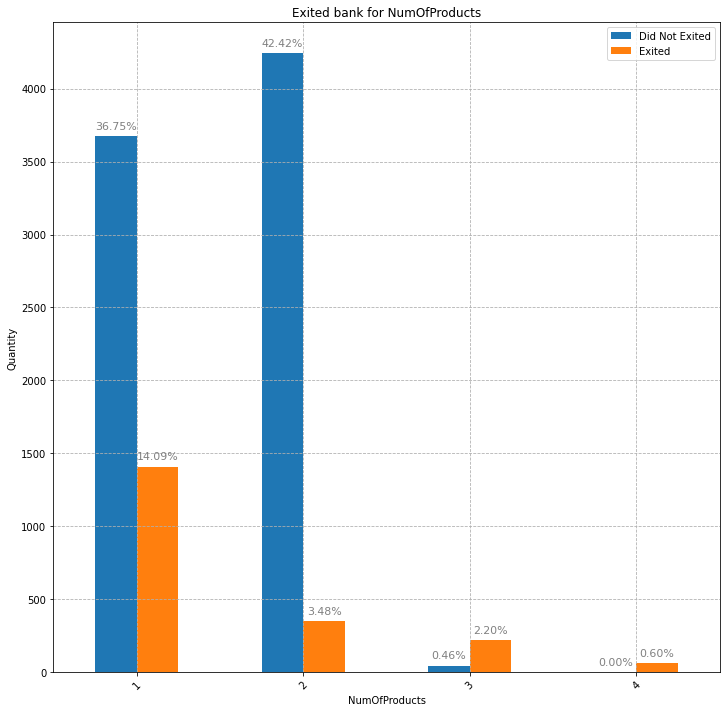

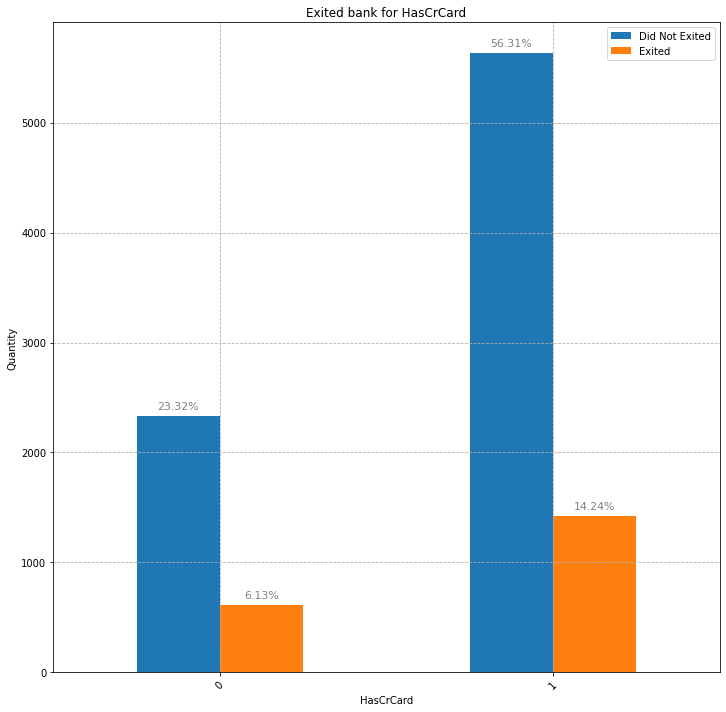

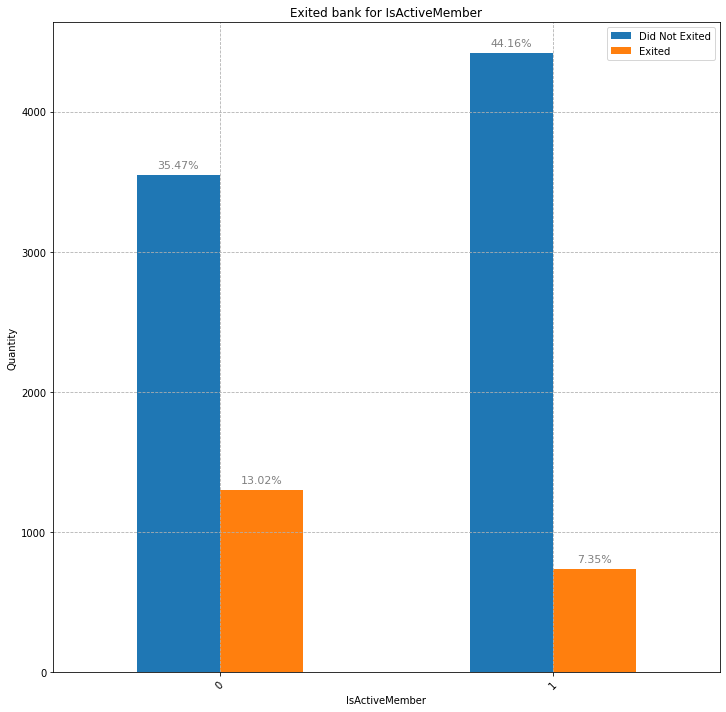

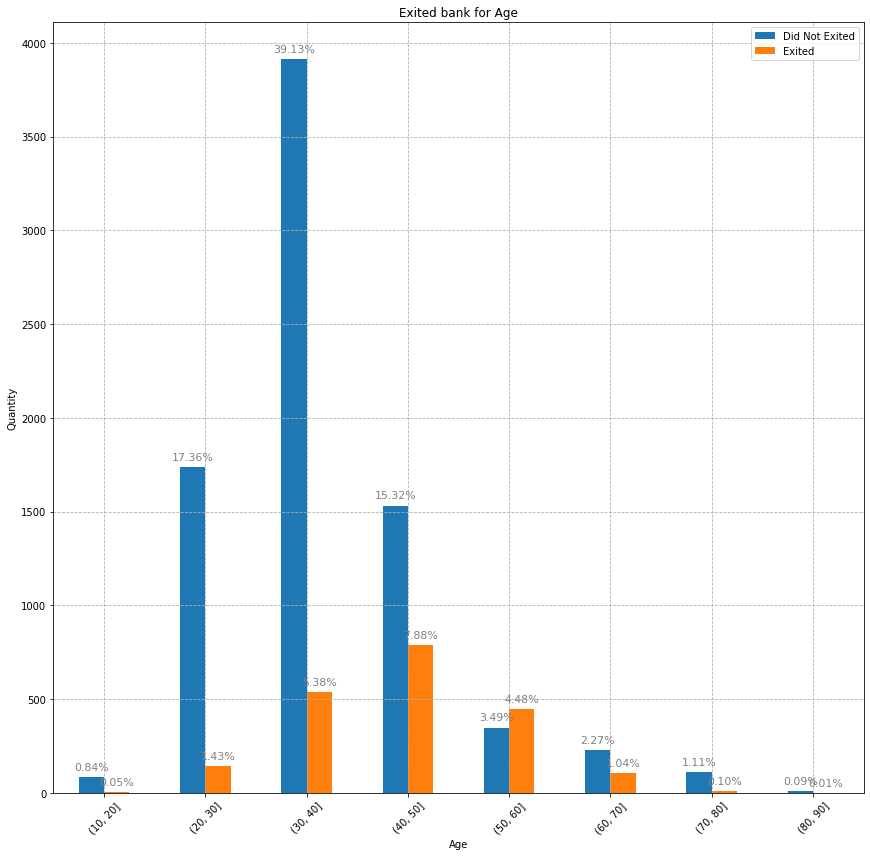

In [6]:
import seaborn as sns
data_raw = pd.read_csv('Proj1_Data.csv')


def barchart (feature1, feature2):
    g = pd.crosstab(data_raw[feature1], data_raw[feature2]).plot(kind= 'bar', figsize=(10,10), rot=45)
    ax = g.axes
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / data_raw.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')
    plt.title('Exited bank for {}'.format(feature1))
    plt.legend(['Did Not Exited', 'Exited'])
    plt.grid(b= True, which='major', linestyle='--')
    plt.xlabel('{}'.format(feature1))
    plt.tight_layout()
    plt.ylabel('Quantity')

def bar_chart_group(feature, bins):
    g = pd.crosstab(pd.cut(data_raw[feature], bins), data_raw['Exited']).plot(kind='bar', figsize=(12,12), rot = 45)
    ax = g.axes
    for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / data_raw.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
    plt.grid(b=True, which='major', linestyle='--')
    plt.legend(['Did Not Exited', 'Exited'])
    plt.title('Exited bank for {}'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.tight_layout()
    plt.ylabel('Quantity')

def geography (feature1, feature2):
    data_raw.groupby(feature1)[feature2].sum().sort_values().plot(kind='bar', figsize=(10,10), rot=45)
    plt.title('Geography {}'.format(feature2))
    plt.grid(b=True, which='major', linestyle='--')
    plt.tight_layout()
    plt.ylabel('{}'.format(feature2)) 





sns.countplot(data_raw.Exited)
barchart('Geography', 'Exited')
barchart('NumOfProducts', 'Exited')
barchart('HasCrCard', 'Exited')
barchart('IsActiveMember', 'Exited')
bar_chart_group('Age', range(0, 100, 10))
